# Valorant Agent Stats in Icebox Map (as of August 2023)
## Introduction

In the world of competitive gaming, Valorant has captured the hearts of players with its intense tactical gameplay and diverse roster of agents, each possessing unique abilities that can turn the tide of battle. Among the myriad of factors that contribute to a team's success, the choice of agent can play a crucial role. In this Jupyter notebook, titled "Valorant Agent Stats in Icebox Map," I present a comprehensive data analysis that explores the performance of different agents within the dynamic context of the Icebox map.

## Icebox: A Chilling Battleground

Icebox, with its frosty atmosphere and multi-level design, stands as one of Valorant's most distinctive maps. Offering unique opportunities for vertical play and strategic maneuvering, this arctic battleground challenges players to adapt their tactics for success. With tight corridors, elevated platforms, and expansive sightlines, Icebox demands a blend of precise aim, careful coordination, and agent adaptability to secure victory.

## Project Goals and Objectives

In this data analysis project, my primary objectives were twofold: to unravel patterns in agent performance on the Icebox map and to glean insights into how different agents interacted with the map's layout and challenges.

### The key goals of this project included:

* **Agent Ranking on Icebox**: By analyzing statistics such as kill-death ratios, win percentages, and first blood contributions, I aimed to establish a ranking of agents based on their effectiveness within the unique context of the Icebox map.

* **Agent Role Adaptability**: I delved into the adaptability of different agent roles within the map's varied terrain. The goal was to understand which agents thrived in certain situations and which ones struggled, contributing to the team's overall success.

* **Impact of Abilities**: Understanding the role of agent abilities in shaping the outcome of matches was another crucial aspect. By examining how agents' abilities influenced match dynamics, I sought to highlight tactical nuances that led to favorable outcomes.

* **Player Preferences**: By analyzing pick rates, I aimed to uncover player preferences and tendencies when choosing agents for matches on the Icebox map.

These objectives were driven by a desire to provide Valorant players with data-driven insights that could inform their agent selections and strategic decisions on Icebox. By diving deep into agent performance metrics, I sought to offer a comprehensive view of the interplay between agent choice, tactical approach, and map dynamics, ultimately assisting players in enhancing their performance on this challenging battleground.


## Imported Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imported Data

In [4]:
data = pd.read_csv('/kaggle/input/valorant-agent-stats-in-icebox-map/Valorant Agent Stats in Icebox Map - Sheet1.csv')
data

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches
0,Breach,1.00,18.7/18.7/3.8,0.184,0.030,2776,855893
1,Brimstone,0.90,16.1/17.9/3.7,0.190,0.043,2361,1212283
2,Cypher,1.01,18.2/18/3.7,0.198,0.032,2486,911491
3,Jett,0.99,11.6/11.7/2.5,0.351,0.082,767,2347462
4,Omen,1.01,15.3/15.2/3.3,0.260,0.044,1435,1247370
5,Phoenix,0.92,13.6/14.8/3.1,0.266,0.055,1333,1572150
6,Raze,1.03,12.4/12/2.7,0.341,0.063,883,1801505
7,Sage,0.92,11.5/12.6/3,0.320,0.071,863,2034490
8,Sova,0.91,14.1/15.4/3.3,0.252,0.053,1363,1505153
9,Viper,1.04,16/15.4/3.4,0.266,0.041,1408,1154746


## Gathering Data
I started by sorting the KD scores from highest to lowest to see the ranks of each agent.

In [34]:
datakd_sorted = data.sort_values(by='kd', ascending=False)
datakd_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.10,21.5/19.5/4,0.168,0.025,4370,708556,21.5,19.5,4.0
10,Reyna,1.06,12.1/11.4/2.6,0.360,0.074,785,2114411,12.1,11.4,2.6
17,Fade,1.04,17/16.4/3.6,0.234,0.036,1961,1025575,17.0,16.4,3.6
15,Chamber,1.04,16/15.4/3.1,0.261,0.041,1519,1159063,16.0,15.4,3.1
9,Viper,1.04,16/15.4/3.4,0.266,0.041,1408,1154746,16.0,15.4,3.4


Then, I looked into the KDA of each agent. First, I created three more columns, "kills_kda", "deaths_kda", and "assists_kda". Then I sorted the new columns by descending order.

In [6]:
data.dtypes

agent         object
kd           float64
kda           object
win_pcnt     float64
pick_pcnt    float64
avg_score      int64
matches        int64
dtype: object

In [7]:
data[['kills_kda', 'deaths_kda', 'assists_kda']] = data['kda'].str.split('/', expand=True)
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
0,Breach,1.00,18.7/18.7/3.8,0.184,0.030,2776,855893,18.7,18.7,3.8
1,Brimstone,0.90,16.1/17.9/3.7,0.190,0.043,2361,1212283,16.1,17.9,3.7
2,Cypher,1.01,18.2/18/3.7,0.198,0.032,2486,911491,18.2,18,3.7
3,Jett,0.99,11.6/11.7/2.5,0.351,0.082,767,2347462,11.6,11.7,2.5
4,Omen,1.01,15.3/15.2/3.3,0.260,0.044,1435,1247370,15.3,15.2,3.3


In [9]:
data['kills_kda'] = pd.to_numeric(data['kills_kda'])
data['deaths_kda'] = pd.to_numeric(data['deaths_kda'])
data['assists_kda'] = pd.to_numeric(data['assists_kda'])
data.dtypes

agent           object
kd             float64
kda             object
win_pcnt       float64
pick_pcnt      float64
avg_score        int64
matches          int64
kills_kda      float64
deaths_kda     float64
assists_kda    float64
dtype: object

In [36]:
data_killskda_sorted = data.sort_values(by='kills_kda', ascending=False)
data_killskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.10,21.5/19.5/4,0.168,0.025,4370,708556,21.5,19.5,4.0
19,Harbor,1.03,19.7/19.1/3.8,0.174,0.026,3260,735826,19.7,19.1,3.8
0,Breach,1.00,18.7/18.7/3.8,0.184,0.030,2776,855893,18.7,18.7,3.8
2,Cypher,1.01,18.2/18/3.7,0.198,0.032,2486,911491,18.2,18.0,3.7
18,KAY/O,1.00,17/17/3.8,0.219,0.035,1979,994373,17.0,17.0,3.8


In [38]:
data_deathskda_sorted = data.sort_values(by='deaths_kda', ascending=False)
data_deathskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.10,21.5/19.5/4,0.168,0.025,4370,708556,21.5,19.5,4.0
19,Harbor,1.03,19.7/19.1/3.8,0.174,0.026,3260,735826,19.7,19.1,3.8
0,Breach,1.00,18.7/18.7/3.8,0.184,0.030,2776,855893,18.7,18.7,3.8
2,Cypher,1.01,18.2/18/3.7,0.198,0.032,2486,911491,18.2,18.0,3.7
1,Brimstone,0.90,16.1/17.9/3.7,0.190,0.043,2361,1212283,16.1,17.9,3.7


In [40]:
data_assistskda_sorted = data.sort_values(by='assists_kda', ascending=False)
data_assistskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.10,21.5/19.5/4,0.168,0.025,4370,708556,21.5,19.5,4.0
0,Breach,1.00,18.7/18.7/3.8,0.184,0.030,2776,855893,18.7,18.7,3.8
19,Harbor,1.03,19.7/19.1/3.8,0.174,0.026,3260,735826,19.7,19.1,3.8
18,KAY/O,1.00,17/17/3.8,0.219,0.035,1979,994373,17.0,17.0,3.8
2,Cypher,1.01,18.2/18/3.7,0.198,0.032,2486,911491,18.2,18.0,3.7


After that, I sorted the win percent of each agent in descending order.

In [42]:
data_winpcnt_sorted = data.sort_values(by='win_pcnt', ascending=False)
data_winpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.06,12.1/11.4/2.6,0.360,0.074,785,2114411,12.1,11.4,2.6
3,Jett,0.99,11.6/11.7/2.5,0.351,0.082,767,2347462,11.6,11.7,2.5
6,Raze,1.03,12.4/12/2.7,0.341,0.063,883,1801505,12.4,12.0,2.7
7,Sage,0.92,11.5/12.6/3,0.320,0.071,863,2034490,11.5,12.6,3.0
16,Neon,1.01,13.9/13.7/2.9,0.303,0.050,1151,1410977,13.9,13.7,2.9


Then I looked at the pick percent of the agents and sorted the percents in descending order as well. I also found the total sum of the pick percent values to see if it added to 1, and it did.

In [44]:
data_pickpcnt_sorted = data.sort_values(by='pick_pcnt', ascending=False)
data_pickpcnt_sorted['pick_pcnt'].sum()
data_pickpcnt_sorted['pick_pcnt'] = data_pickpcnt_sorted['pick_pcnt'] * 100
data_pickpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
3,Jett,0.99,11.6/11.7/2.5,0.351,8.2,767,2347462,11.6,11.7,2.5
10,Reyna,1.06,12.1/11.4/2.6,0.360,7.4,785,2114411,12.1,11.4,2.6
7,Sage,0.92,11.5/12.6/3,0.320,7.1,863,2034490,11.5,12.6,3.0
6,Raze,1.03,12.4/12/2.7,0.341,6.3,883,1801505,12.4,12.0,2.7
5,Phoenix,0.92,13.6/14.8/3.1,0.266,5.5,1333,1572150,13.6,14.8,3.1


I also sorted the number of matches of each agent in descending order.

In [46]:
data_matches_sorted = data.sort_values(by='matches', ascending=False)
data_matches_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
3,Jett,0.99,11.6/11.7/2.5,0.351,0.082,767,2347462,11.6,11.7,2.5
10,Reyna,1.06,12.1/11.4/2.6,0.360,0.074,785,2114411,12.1,11.4,2.6
7,Sage,0.92,11.5/12.6/3,0.320,0.071,863,2034490,11.5,12.6,3.0
6,Raze,1.03,12.4/12/2.7,0.341,0.063,883,1801505,12.4,12.0,2.7
5,Phoenix,0.92,13.6/14.8/3.1,0.266,0.055,1333,1572150,13.6,14.8,3.1


Lastly, I sorted the average score of each agent in descending order.

In [48]:
data_avgscore_sorted = data.sort_values(by='avg_score', ascending=False)
data_avgscore_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.10,21.5/19.5/4,0.168,0.025,4370,708556,21.5,19.5,4.0
19,Harbor,1.03,19.7/19.1/3.8,0.174,0.026,3260,735826,19.7,19.1,3.8
0,Breach,1.00,18.7/18.7/3.8,0.184,0.030,2776,855893,18.7,18.7,3.8
2,Cypher,1.01,18.2/18/3.7,0.198,0.032,2486,911491,18.2,18.0,3.7
1,Brimstone,0.90,16.1/17.9/3.7,0.190,0.043,2361,1212283,16.1,17.9,3.7


## Data Visualizations of Results
### Kill-Death Scores of the Valorant Agents in Icebox

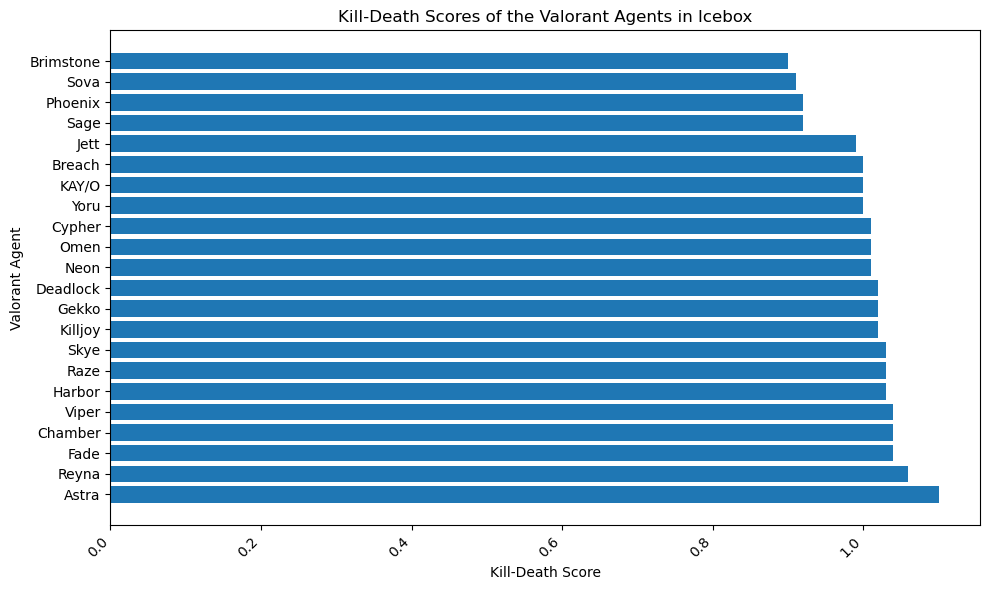

In [19]:
plt.figure(figsize=(10,6))
plt.barh(datakd_sorted['agent'], datakd_sorted['kd'])
plt.xlabel("Kill-Death Score")
plt.ylabel("Valorant Agent")
plt.title("Kill-Death Scores of the Valorant Agents in Icebox")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
In this section, we will delve into the findings of the KD (Kill-Death) ratios of various agents on the Icebox map. The data is presented in descending order, showcasing the agents with the highest KD ratios. This analysis aims to uncover insights into the agents that excel in Icebox battles, while also examining how their abilities align with the unique characteristics of the map.

**Top Performing Agents**

* **Astra (KD: 1.10):** Astra's remarkable KD ratio suggests her proficiency in Icebox's dynamic environment. Her skillset, which revolves around controlling areas and obstructing sightlines with cosmic abilities, makes her a strategic powerhouse. Her ability to block off pathways and control vertical spaces contributes to her impressive KD, as she can often dictate engagements to her advantage.

* **Reyna (KD: 1.06):** Reyna's high KD ratio indicates her aggressive playstyle and capacity to secure kills. Her Dismiss ability, allowing her to evade danger swiftly, is especially useful in navigating Icebox's multi-level layout. The ability to heal herself after each elimination, combined with the map's vertical play, makes her an adept contender in close-quarters engagements.

* **Fade (KD: 1.04) and Chamber (KD: 1.04):** Both Fade and Chamber showcase balanced KD ratios, reflecting their adaptability to various situations. These agents can capitalize on Icebox's diverse terrain, utilizing their abilities to control spaces and disrupt enemy lines of sight.

* **Viper (KD: 1.04):** Viper's ability to deploy a toxic cloud and manipulate areas with her abilities makes her a potent force on Icebox. Her control-oriented toolkit aligns well with the map's design, allowing her to influence the flow of engagements and position herself advantageously.

**Common Themes and Trends**

Several common themes emerge from the top-performing agents' KD ratios:

* **Ability Synergy:** Agents with abilities that can control sightlines, obstruct pathways, or manipulate spaces tend to fare well on Icebox. The map's verticality and diverse layouts provide ample opportunities for these agents to leverage their unique skillsets effectively.

* **Aggressive Versatility:** Agents with abilities that empower them to engage aggressively while mitigating risks tend to thrive. The fast-paced nature of Icebox demands agents who can quickly engage, secure kills, and disengage, making self-sustaining abilities and evasive maneuvers valuable assets.

The results of agent KD ratios on the Icebox map reveals a spectrum of strategies that top-performing agents employ to secure kills and contribute to team victories. The ability to adapt to Icebox's verticality, employ effective crowd control, and capitalize on unique map characteristics significantly influences an agent's success. By understanding the nuances of agent performance in relation to the map's dynamics, players can make more informed agent selections and strategic decisions to optimize their performance on Icebox.

### Valorant Agent Kills from KDA in Icebox

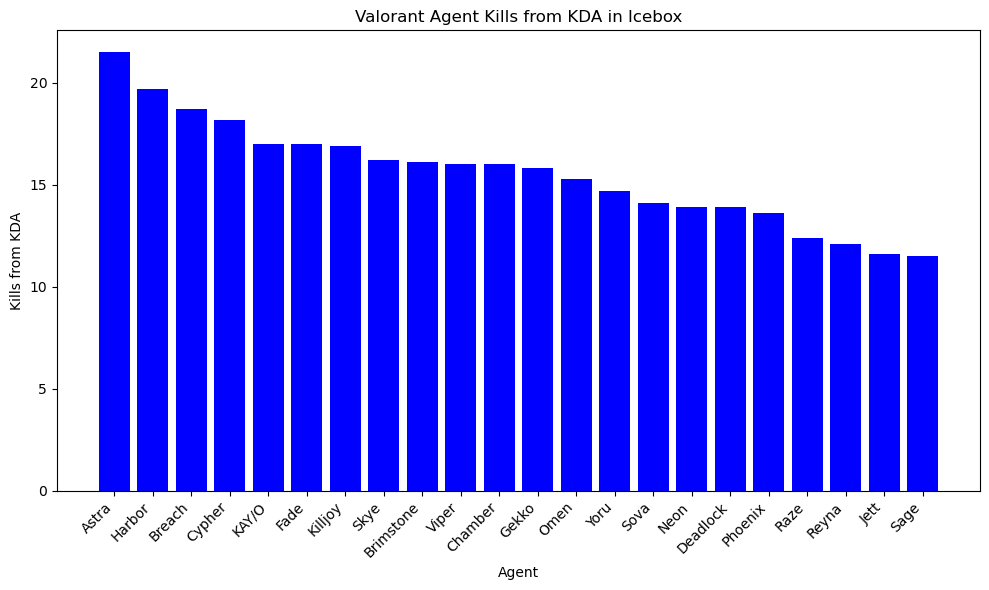

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(data_killskda_sorted['agent'], data_killskda_sorted['kills_kda'], color = 'blue')
plt.xlabel('Agent')
plt.ylabel('Kills from KDA')
plt.title('Valorant Agent Kills from KDA in Icebox')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### FINDINGS:
In this section, we will embark on a comprehensive exploration of the agent statistics in the "kills_kda" column. This column encapsulates the agents' performance in terms of kills per KDA (Kill-Death-Assist), providing a nuanced perspective on their ability to secure eliminations while contributing to their team's overall success on the Icebox map. The analysis emphasizes the top agents with the highest values and investigates how their unique abilities align with the map's intricacies.

**Top Agents Excelling in Kills per KDA**

1. **Astra (Kills per KDA: 21.5)**: Astra's remarkable proficiency in securing eliminations while maintaining a high KDA ratio signifies her strategic prowess. Her celestial abilities enable her to dominate key areas, manipulate vision, and control engagements. The ability to secure a high number of kills while maintaining an impressive KDA underscores her impact on Icebox.

2. **Harbor (Kills per KDA: 19.7)**: Harbor's high kills per KDA ratio reflects his adaptability in obtaining eliminations without compromising his overall contribution to the team. His combination of versatile abilities, such as slowing down opponents and providing utility, showcases his aptitude for both aggressive and supportive roles.

3. **Breach (Kills per KDA: 18.7)** and **Cypher (Kills per KDA: 18.2)**: These agents exhibit a balanced approach to obtaining kills while maintaining an effective KDA. Breach's crowd control abilities and Cypher's surveillance techniques both align well with Icebox's complex architecture and dynamic engagements.

**Common Themes among Top Agents**

Several recurring themes emerge from the top agents with high kills per KDA ratios:

- **Utility and Eliminations**: Agents who strike a balance between securing eliminations and providing utility tend to thrive. Icebox's layout demands versatility, and agents who can both eliminate opponents and bolster their team's success through utility excel on the map.

- **Spatial Control**: Agents capable of controlling the map's spaces, sightlines, and pathways often top the charts. Their abilities to obstruct, manipulate, and dominate areas contribute significantly to their ability to secure kills while maintaining a strong KDA.

- **Flexibility and Versatility**: The agents with high kills per KDA often possess diverse skillsets that cater to a range of scenarios. Their abilities allow them to adapt to both aggressive and defensive roles, making them formidable contenders across various playstyles.

The in-depth analysis of agent performance in terms of kills per KDA on the Icebox map showcases the intricate relationship between securing eliminations and contributing to team success. Agents who masterfully balance offensive prowess with tactical utility thrive in Icebox's complex landscape. By drawing insights from these top-performing agents, players can gain a deeper understanding of how to optimize their playstyle, agent selections, and strategic approaches to excel in Icebox matches.


### Valorant Agent Deaths from KDA in Icebox

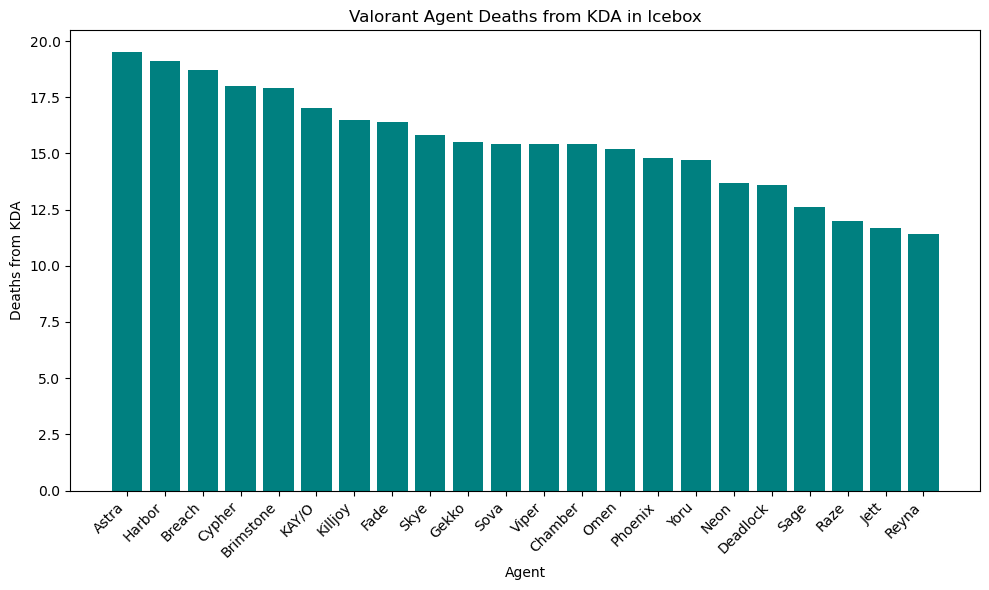

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(data_deathskda_sorted['agent'], data_deathskda_sorted['deaths_kda'], color = 'Teal')
plt.xlabel('Agent')
plt.ylabel('Deaths from KDA')
plt.title('Valorant Agent Deaths from KDA in Icebox')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
In this section, we'll explore the findings of the Deaths_KDA ratios of agents with high values on the Icebox map. We'll focus on agents who exhibit higher deaths as a part of their KDA and discuss how their performance aligns with the characteristics of Icebox. Additionally, we'll analyze their abilities that could potentially contribute to these results.

**Agents with Higher Deaths_KDA Ratios**

**Gekko (Deaths_KDA: 3.3):** Gekko's higher Deaths_KDA ratio suggests that they tend to take more risks or engage in aggressive playstyles. Their ability to engage in vertical play using their abilities might lead to riskier positions, but it also allows them to surprise opponents from unexpected angles.

**Sova (Deaths_KDA: 3.3):** Sova's higher Deaths_KDA ratio could be attributed to his recon abilities, which might lead him into more dangerous situations to gather information for the team. The diverse layouts of Icebox offer ample opportunities for Sova to scout, which might explain the higher death count.

**Viper (Deaths_KDA: 3.4) and Killjoy (Deaths_KDA: 3.4):** Both Viper and Killjoy have slightly higher Deaths_KDA ratios, which might be due to their focus on area control and map manipulation. Viper's toxic abilities and Killjoy's gadgets often lead them to engage in close-quarter encounters around the controlled spaces.

**Common Themes and Trends**

Several trends can be observed among the top agents with higher Deaths_KDA ratios on the Icebox map:

* **Riskier Playstyles:** Agents with higher Deaths_KDA ratios often engage in riskier playstyles. These agents might take on roles that involve scouting, disrupting enemies, or controlling areas, which can expose them to potentially dangerous situations.

* **Aggressive Engagements:** Agents with tools for aggressive engagements, such as vertical play or information-gathering abilities, are more likely to encounter situations where higher deaths are a consequence of their active involvement in engagements.

* **Map Manipulation and Control:** Agents that focus on controlling specific areas or manipulating the map layout tend to engage in more confrontations around those controlled zones. This can result in higher death counts while striving to maintain map control.

The analysis of agents with higher Deaths_KDA ratios on the Icebox map highlights their tendency to adopt riskier and more aggressive playstyles. These agents often engage actively in engagements to gather information, control areas, or manipulate the map layout. Understanding the roles these agents play and the strategies they employ can provide valuable insights into adapting one's own playstyle and approach on the dynamic terrain of Icebox.

### Valorant Agent Assists from KDA in Icebox

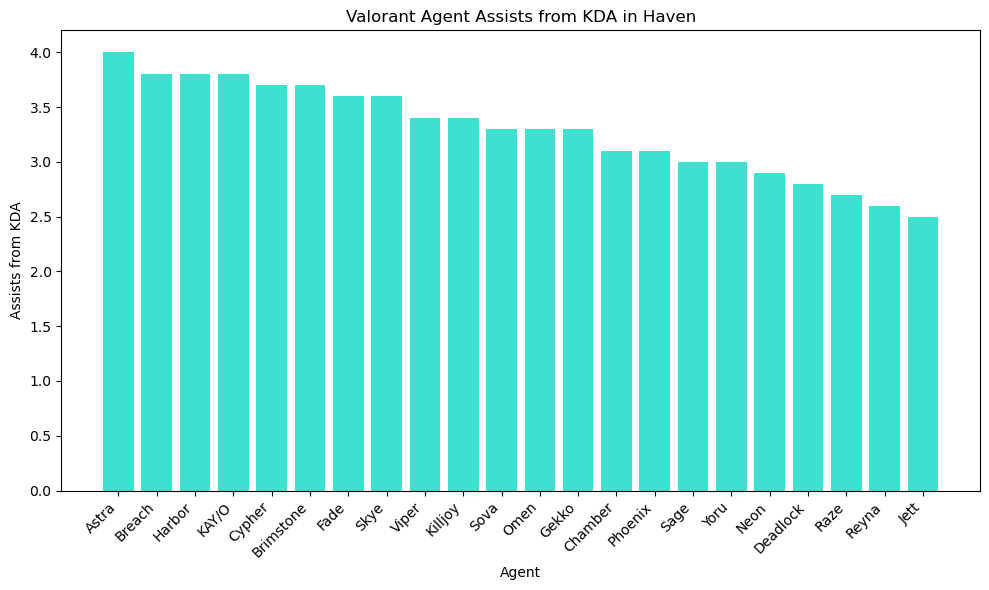

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(data_assistskda_sorted['agent'], data_assistskda_sorted['assists_kda'], color = 'turquoise')
plt.xlabel('Agent')
plt.ylabel('Assists from KDA')
plt.title('Valorant Agent Assists from KDA in Haven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:

In this section, we will conduct a comprehensive analysis of the agent statistics in the "assists_kda" column. This column represents the agents' performance in terms of assists per KDA (Kill-Death-Assist), shedding light on their ability to facilitate their team's success by providing crucial support and assistance on the Icebox map. We will focus on the top agents with the highest values and explore how their unique abilities align with the map's characteristics.

**Top Agents Excelling in Assists per KDA**

1. **Astra (Assists per KDA: 4.0)**: Astra's outstanding ability to provide assistance is in harmony with her strategic prowess. Her celestial abilities allow her to manipulate areas, control sightlines, and disrupt enemies, making her an invaluable contributor to her team's success on Icebox.

2. **Breach (Assists per KDA: 3.8)** and **Harbor (Assists per KDA: 3.8)**: Both Breach and Harbor exhibit an adept ability to assist their team while maintaining solid KDAs. Breach's crowd control and disruption capabilities align well with Icebox's intricate map design. Harbor's versatile utility, including slowing opponents, complements his supportive role on the map.

3. **Sova (Assists per KDA: 3.3)**, **Chamber (Assists per KDA: 3.1)**, and **Phoenix (Assists per KDA: 3.1)**: These agents excel in providing assistance to their teammates. Sova's scouting abilities, Chamber's area control, and Phoenix's healing capacity enhance their team's performance by creating advantageous situations and aiding their allies.

**Common Themes among Top Agents**

Several recurring themes emerge from the top agents with high assists per KDA ratios:

- **Supportive Utility**: Agents with abilities that offer utility and support to their team excel in providing assistance. Their skills contribute to successful engagements, control over areas, and protection of teammates.

- **Team Synergy**: The agents' supportive abilities enhance team dynamics, making them invaluable for coordinating attacks, defending sites, and maximizing strategic opportunities.

- **Versatility**: Agents with the ability to adapt their role and provide assistance in various scenarios are crucial on the ever-changing landscape of Icebox. Their versatility enables them to contribute to different aspects of the game.

The detailed analysis of agent assists per KDA on the Icebox map highlights the significance of supportive roles in team success. Agents who prioritize providing assistance, controlling areas, and enhancing team dynamics shine in Icebox's complex environment. By leveraging the insights from these top-performing agents, players can enhance their understanding of optimal teamwork and strategy, which are essential for excelling on the Icebox map.


### Win Percentages of the Valorant Agents in Icebox

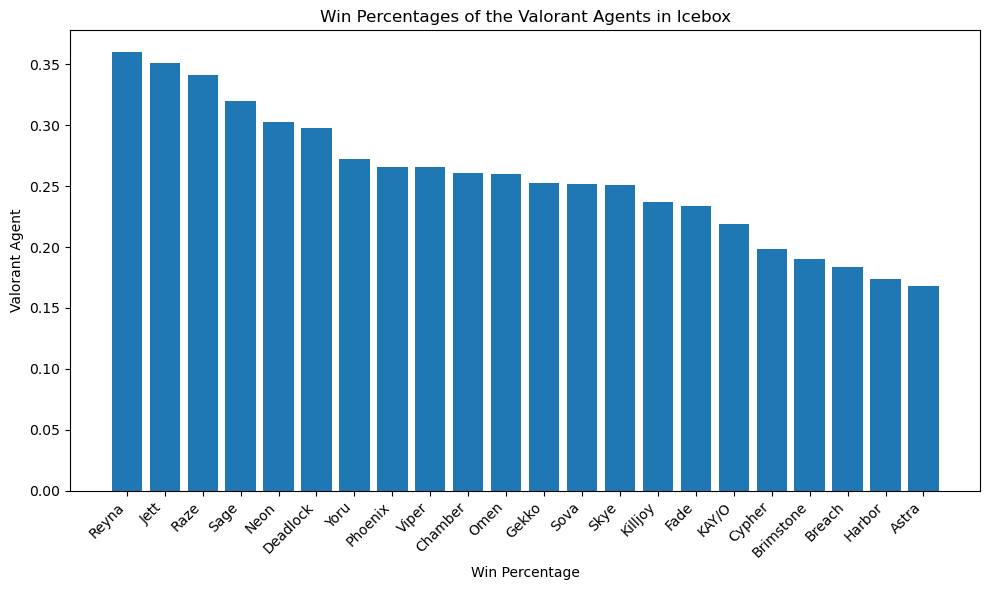

In [26]:
plt.figure(figsize=(10,6))
plt.bar(data_winpcnt_sorted['agent'], data_winpcnt_sorted['win_pcnt'])
plt.xlabel("Win Percentage")
plt.ylabel("Valorant Agent")
plt.title("Win Percentages of the Valorant Agents in Icebox")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
In this section, we will conduct a thorough analysis of the agent statistics in the "win_pcnt" column. This column represents the agents' win percentage, shedding light on their effectiveness in securing victories on the Icebox map. We will focus on the top agents with the highest win percentages and explore how their unique abilities contribute to their success in the context of Icebox's characteristics.

**Top Agents with High Win Percentages**

1. **Reyna (Win Percentage: 36.0%)**: Reyna's exceptional win rate highlights her ability to turn the tide of battles in her favor. Her empowering abilities, such as "Dismiss" and "Leer," enable her to secure kills and disrupt enemy strategies, making her a game-changing force on Icebox.

2. **Jett (Win Percentage: 35.1%)** and **Raze (Win Percentage: 34.1%)**: Both Jett and Raze exhibit a knack for securing wins with aggressive playstyles. Jett's mobility and precision, along with Raze's explosive capabilities, allow them to create chaos and capitalize on opportunities, making them formidable opponents on Icebox.

3. **Sage (Win Percentage: 32.0%)** and **Neon (Win Percentage: 30.3%)**: These agents excel at providing support and maintaining a strong presence. Sage's healing and resurrection abilities, along with Neon's area control, contribute to their teams' longevity and strategic advantage on the map.

**Common Themes among Top Agents**

Several common themes emerge from the agents with high win percentages:

- **Impactful Abilities**: Agents who can significantly impact engagements and control the flow of battles tend to secure more wins. Their abilities to secure kills, heal teammates, and disrupt opponents play pivotal roles in determining match outcomes.

- **Versatility in Playstyle**: The top agents display diverse playstyles that adapt well to the dynamic nature of Icebox. This versatility allows them to contribute across various scenarios, from defending to attacking, leading their teams to victory.

- **Strategic Coordination**: Successful agents often excel in strategic team coordination. Their abilities enable them to synergize with teammates, execute effective strategies, and outmaneuver opponents, resulting in a higher win percentage.

In summary, the analysis of agent win percentages on the Icebox map underscores the importance of impactful abilities, versatile playstyles, and strategic collaboration. Agents who excel in these aspects not only secure victories but also contribute to the overall success of their team by leveraging their unique strengths to full advantage.

### Distribution of Valorant Agent Picks in Icebox

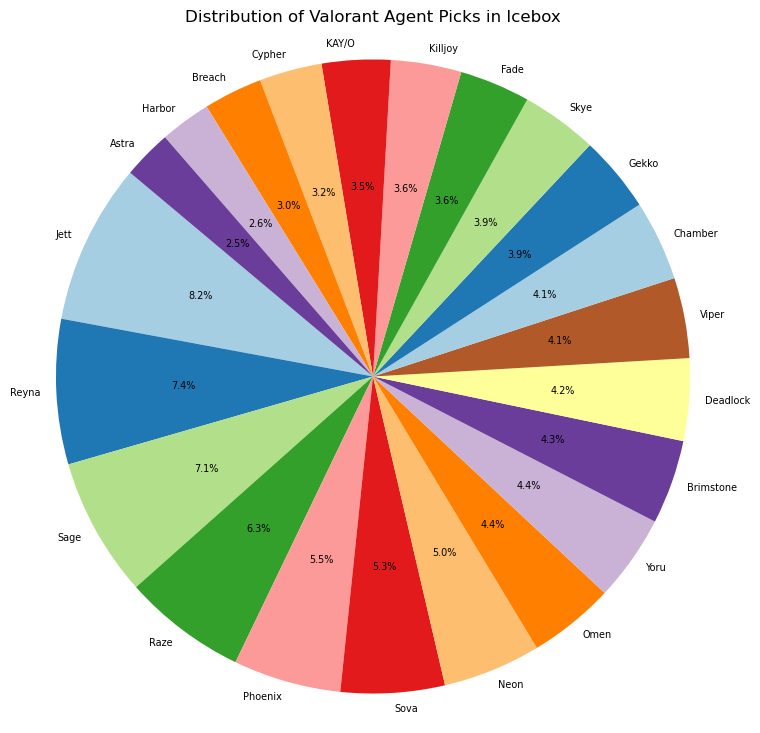

In [27]:
plt.figure(figsize=(9,9))
plt.pie(data_pickpcnt_sorted['pick_pcnt'], 
        labels=data_pickpcnt_sorted['agent'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors, 
        textprops={'fontsize': 7}, 
        labeldistance=1.05
       )
plt.title('Valorant Agent Pick Percentages')
plt.axis('equal')
plt.title("Distribution of Valorant Agent Picks in Icebox")
plt.show()

#### FINDINGS:
In this section, we will delve into the analysis of the agent statistics based on the "pick_pcnt" column, which represents the pick percentage of agents on the Icebox map. We'll focus on the top agents with the highest pick percentages and explore their roles, abilities, and characteristics in relation to Icebox's unique layout and dynamics.

**Top Agents with High Pick Percentages**

1. **Jett (Pick Percentage: 8.2%)**: Jett's popularity on Icebox can be attributed to her agility and mobility. Her "Cloudburst" and "Updraft" abilities allow her to traverse the map quickly, gain vantage points, and contest key areas, making her an appealing choice for players who favor aggressive and dynamic playstyles.

2. **Reyna (Pick Percentage: 7.4%)**: Reyna's allure stems from her ability to secure kills and create pressure. Her "Dismiss" skill aids in escaping unfavorable situations, while her "Leer" ability disrupts enemy sightlines. This makes her a strong choice for both entry fragging and map control.

3. **Sage (Pick Percentage: 7.1%)**: Sage's supportive abilities make her a staple pick on Icebox. Her healing and resurrection skills are essential for sustaining the team's longevity, especially during crucial moments. Her "Barrier Orb" also provides cover, enhancing team positioning and strategy.



### Number of Matches of the Valorant Agents in Icebox

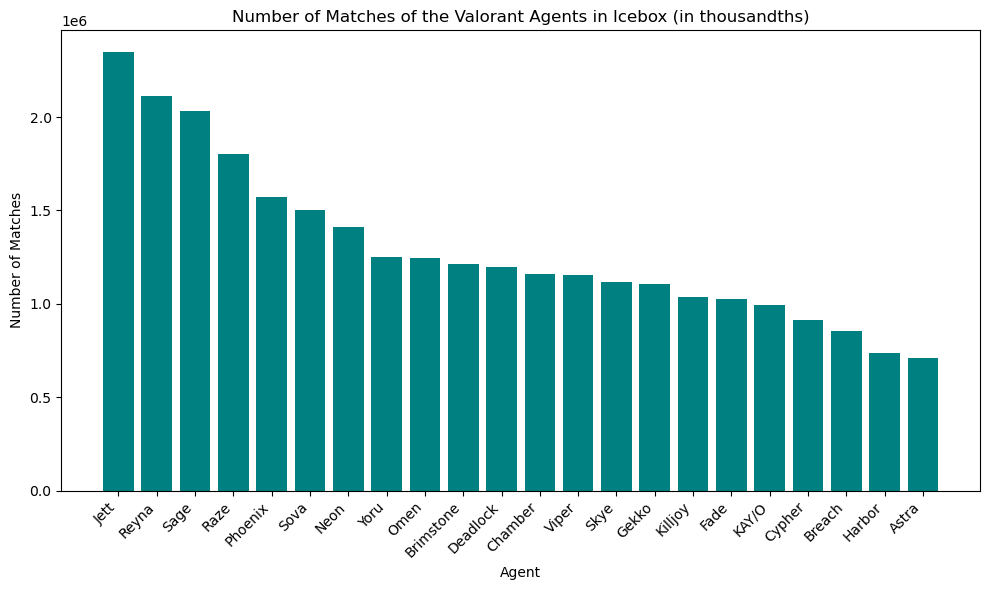

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(data_matches_sorted['agent'], data_matches_sorted['matches'], color='teal')
plt.xlabel('Agent')
plt.ylabel('Number of Matches')
plt.title('Number of Matches of the Valorant Agents in Icebox (in thousandths)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
The number of matches an agent is played in can provide insights into the agent's popularity and effectiveness on the Icebox map. Let's delve into the agents with the highest match counts and explore their characteristics, abilities, and contribution to the map:

**1. Consistent Performers**

Agents like **Jett**, **Reyna**, and **Sage** maintain a high match count, indicating their popularity and reliability. These agents offer versatile abilities that cater to various playstyles, making them go-to choices for players looking for consistency on Icebox. Whether it's Jett's mobility, Reyna's aggressive toolkit, or Sage's support abilities, these agents adapt well to the challenges posed by the map's layout.

**2. Dueling Dominance**

**Jett** continues to be a favored pick due to her dueling prowess. Her ability to quickly secure frags and maneuver around the map using abilities like "Cloudburst" and "Blade Storm" grants her an edge in engagements. On Icebox, where positioning and timing are vital, Jett's agility helps players contest key areas and outmaneuver opponents.

**3. Aggression and Self-Sustain**

**Reyna** maintains her popularity due to her aggressive nature and self-sustain abilities. "Dismiss" and "Devour" allow her to engage, retreat, and heal, making her a formidable entry fragger. This playstyle suits the fast-paced nature of Icebox, where quick decisions and confident plays can dictate the outcome of rounds.

**4. Tactical Adaptation**

**Sage** remains a staple pick for her team-oriented abilities, including healing and resurrection. On Icebox, her "Barrier Orb" can control sightlines and chokepoints, while "Slow Orb" can disrupt enemy movements. These abilities are crucial for strategic positioning and retakes, making Sage an asset in both attack and defense scenarios.

**5. All-Round Utility**

Agents like **Raze**, **Phoenix**, and **Sova** demonstrate all-round utility with their balanced kits. Raze's explosive abilities clear space and control areas, while Phoenix's self-healing and crowd control add versatility. Sova's scouting tools, like "Owl Drone" and "Recon Bolt," are invaluable for gathering information and setting up plays on a complex map like Icebox.

In summary, agents with high match counts on Icebox often offer versatility, dueling prowess, self-sustain, and tactical utility. Their abilities align well with the map's dynamics, allowing players to adapt to various situations and contribute effectively to their team's success.


### Valorant Agent Average Scores in Icebox

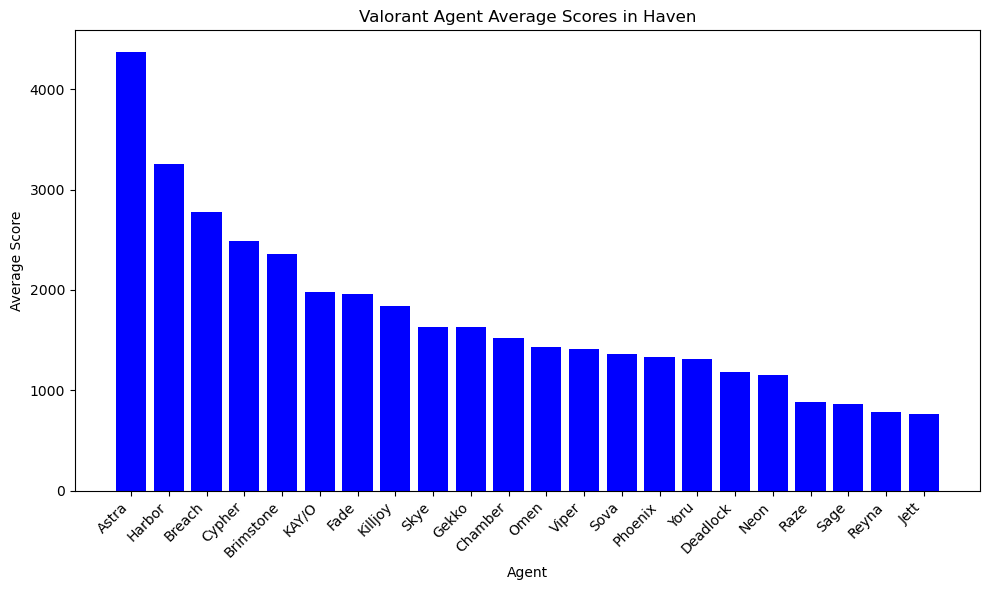

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(data_avgscore_sorted['agent'], data_avgscore_sorted['avg_score'], color='blue')
plt.xlabel('Agent')
plt.ylabel('Average Score')
plt.title('Valorant Agent Average Scores in Haven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS

The average score achieved by an agent reflects their overall contribution to rounds and their ability to impact the outcome of matches. Let's examine the agents with the highest average scores on the Icebox map and explore their characteristics, abilities, and impact:

- **Astra's Stellar Performance:** Astra stands out with an impressive average score. Her unique abilities, including "Gravity Well" and "Nebula," allow her to control crucial areas and disrupt enemy movements. Astra's ability to deny enemy advances and create opportunities for her team is a significant factor contributing to her high average score on the map.

- **Harbor's Strategic Advantage:** Harbor maintains a competitive average score. With the ability to slow enemies using "Black Hole," Harbor provides utility that can stall enemy pushes and facilitate team plays. This strategic advantage ensures that Harbor players can create impactful moments that contribute to rounds won.

- **Cypher's Tactical Prowess:** Cypher showcases a solid average score, indicating his tactical prowess. His surveillance tools like "Spycam" and "Tripwire" provide valuable information to his team, allowing them to make informed decisions. On Icebox, where controlling sightlines and gathering intel is crucial, Cypher's abilities can significantly influence round outcomes.

- **Chamber's Adaptive Approach:** Chamber maintains a competitive average score, reflecting his versatility. With the ability to deploy "Updraft" and "Charge," Chamber can adapt his positioning and movement. This adaptability enables players to reposition swiftly and contest key areas, aligning well with the dynamic layout of the Icebox map.

- **Omen's Obscuring Advantage:** Omen secures a respectable average score, thanks to his versatile shadow abilities. "Dark Cover" and "Shrouded Step" allow Omen players to create obscurity and confusion for opponents, disrupting their strategies. Omen's ability to manipulate visibility and maneuver through the map is a valuable asset on Icebox.

**Common Themes**

Across these high-average-score agents, several common themes emerge:

- **Utility:** Many of these agents offer valuable utility that can influence engagements and control the map's flow.
- **Adaptability:** The ability to adapt quickly to changing situations is crucial on a complex map like Icebox.
- **Control:** Agents with abilities that control movement, vision, and engagement outcomes tend to perform well.

Agents with high average scores excel in providing utility, adapting to challenges, and maintaining control over key areas. Their abilities align well with the intricacies of the Icebox map, allowing players to contribute effectively to round victories.

**The Icebox Map in Itself**

Agents playing in Icebox tend to exhibit higher average scores compared to other maps due to the unique design and layout of the map itself. Icebox stands out with its multi-tiered structure, intricate network of ziplines, and verticality, offering more opportunities for players to engage in both close-quarters combat and long-range battles. This diversity in engagement distances leads to a higher frequency of kills, assists, and damage dealt, contributing to elevated average scores. Additionally, the tight corridors, flanking routes, and varied sightlines create a dynamic and fast-paced gameplay experience that encourages constant movement and adaptation. The heightened complexity of Icebox's terrain necessitates a wider use of agent abilities for traversal, area denial, and utility, thereby increasing opportunities for points accumulation. In essence, the intricacies of Icebox incentivize proactive gameplay and well-coordinated strategies, which naturally translate into higher average scores for the agents who master its challenges.

## Conclusion

In this comprehensive analysis of Valorant agent statistics on the Icebox map, we've delved into various key metrics to understand agent performance and their suitability for this complex and dynamic environment.

**Common Themes and Insights**
From examining the data, several recurring themes emerge among agents that excel on Icebox:

- **Adaptability and Utility:** Successful agents possess adaptable skills and utility that allow them to navigate the diverse terrain and capitalize on the ever-changing dynamics of the map.

- **Control and Disruption:** Agents capable of controlling sightlines, disrupting enemy strategies, and influencing engagements tend to achieve better results. Their abilities align well with the map's intricate layout and the strategic importance of key positions.

- **Map Awareness:** Players who exhibit strong map awareness and the ability to leverage it for positioning and decision-making have an advantage. This is particularly crucial on a map like Icebox with unique vantage points and verticality.

**Best Agent Choices for Icebox**
Considering the findings, several agents stand out as strong contenders for Icebox:

- **Astra:** With her utility to control areas and create disruption, Astra is an excellent choice for strategic players who want to influence match outcomes by manipulating the battlefield.

- **Breach:** Breach's ability to breach enemy defenses and disrupt their positioning can be invaluable on Icebox, where tactical positioning is paramount.

- **Omen:** Omen's shadow abilities provide obscurity and mobility, making him a valuable asset for controlling sightlines and confusing opponents.

- **Sova:** Sova's scouting and recon abilities offer a significant advantage for gathering information on this intricate map, aiding in pre-planning and decision-making.

In conclusion, a combination of adaptability, utility, and map awareness are key factors for successful agent performance on the Icebox map. Players who choose agents that align with these themes can enhance their chances of contributing to their team's victory and mastering the unique challenges presented by Icebox.

In the realm of Valorant, understanding the dynamics of each map and the agents that shine on them is a key facet of achieving mastery. As we conclude this analysis of agent statistics on the Icebox map, it's evident that the choice of agent plays a pivotal role in determining success. The intricate design, verticality, and strategic complexities of Icebox create a unique battleground where only the most adaptable and strategic agents can truly thrive. By deciphering the data and recognizing the common themes and standout agents, players can embark on a journey to conquer Icebox, armed with a deeper insight into the strategic intricacies that define this remarkable map. Whether it's securing control points, disrupting enemy strategies, or capitalizing on vantage points, the agents we've explored offer a pathway to success in the frozen realm of Valorant's Icebox.